# Data set 확인

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import sklearn

plt.style.use('seaborn')
sns.set(font_scale=2.5)

import missingno as msno

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
os.listdir("input")

['sample_submission.csv', 'test.csv', 'train.csv']

In [3]:
df_train = pd.read_csv("input/train.csv")
df_test = pd.read_csv("input/test.csv")
df_submit = pd.read_csv("input/sample_submission.csv")

In [4]:
print(df_train.shape)
print(df_test.shape)
print(df_submit.shape)

(891, 12)
(418, 11)
(418, 2)


In [5]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df_submit.columns

Index(['PassengerId', 'Survived'], dtype='object')

In [7]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
df_submit.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [10]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [11]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## 결측치 확인

In [13]:
df_train.isnull().sum() / df_train.shape[0]

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [14]:
df_test.isnull().sum() / df_test.shape[0]

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Cabin          0.782297
Embarked       0.000000
dtype: float64

## Target Label(Survived) 확인

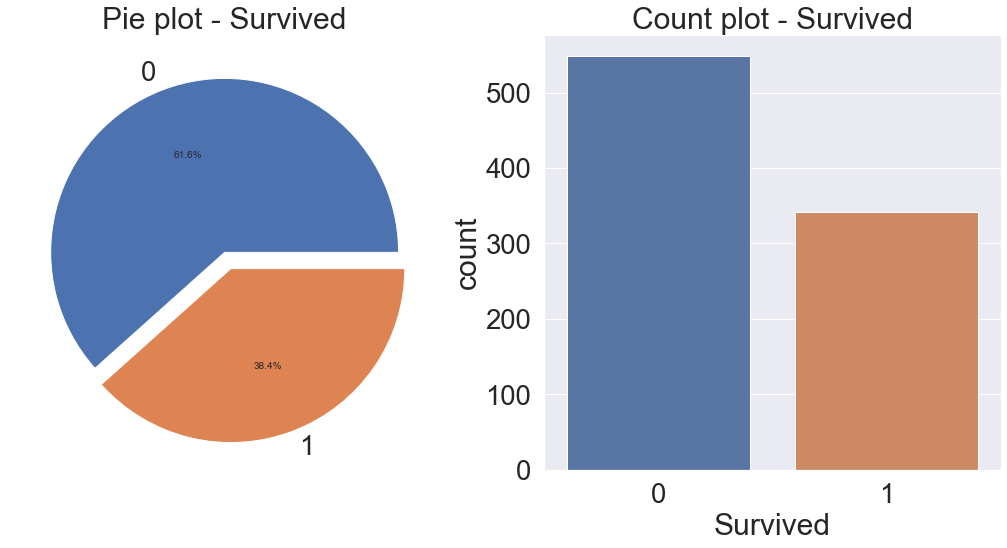

In [15]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

df_train['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax[0])
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

# EDA

## Pclass

In [16]:
# pclass 그룹별 데이터 count
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [17]:
# pclass 그룹별 생존자 수
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [18]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [19]:
# pclass 그룹별 생존율
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


<AxesSubplot:xlabel='Pclass'>

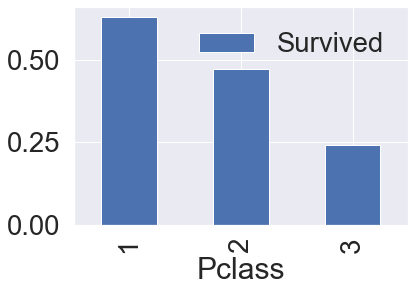

In [20]:
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).mean().plot.bar()

클래스 높을수록 생존율 높음

## Sex

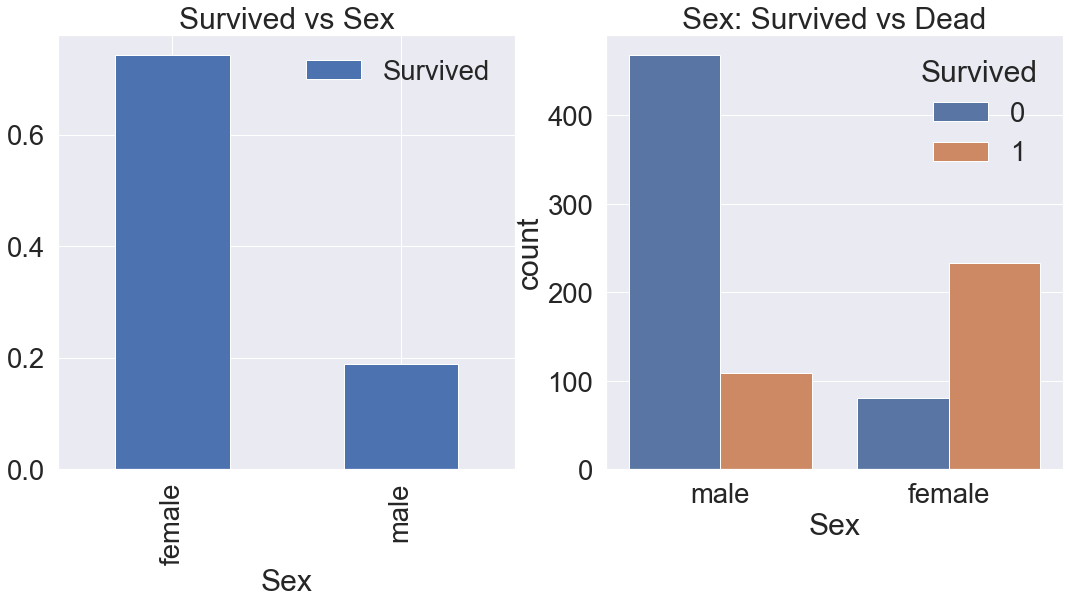

In [21]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

df_train[['Sex','Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')

plt.show()

여자가 생존율 높음

## Both Sex and Pclass

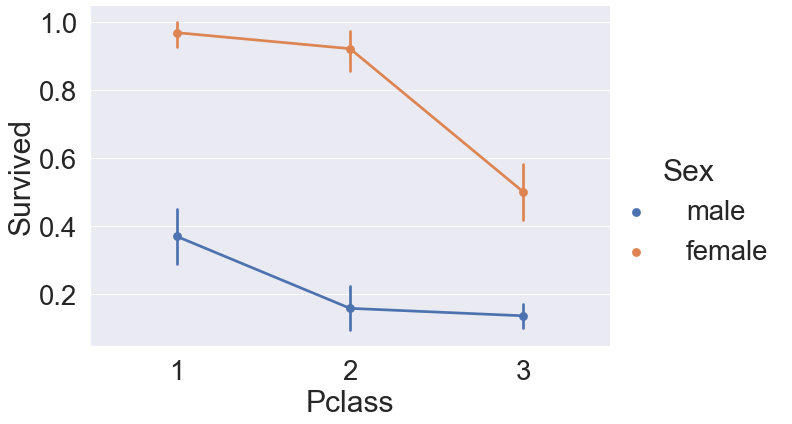

In [22]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train, size=6, aspect=1.5)

## Age

In [23]:
print("가장 나이 많은 탑승객 : {:.1f} years".format(df_train['Age'].max()))
print("가장 나이 어린 탑승객 : {:.1f} years".format(df_train['Age'].min()))
print("탑승객 평균 나이 : {:.1f} years".format(df_train['Age'].mean()))

가장 나이 많은 탑승객 : 80.0 years
가장 나이 어린 탑승객 : 0.4 years
탑승객 평균 나이 : 29.7 years


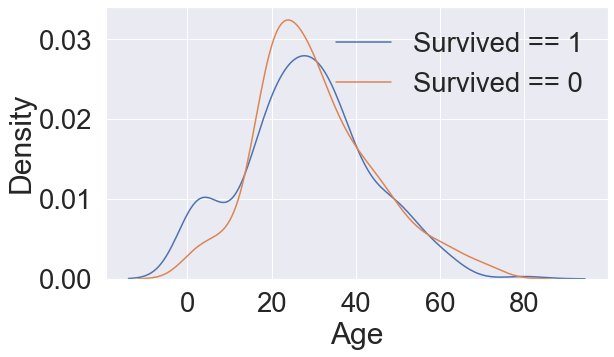

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(9,5))

sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

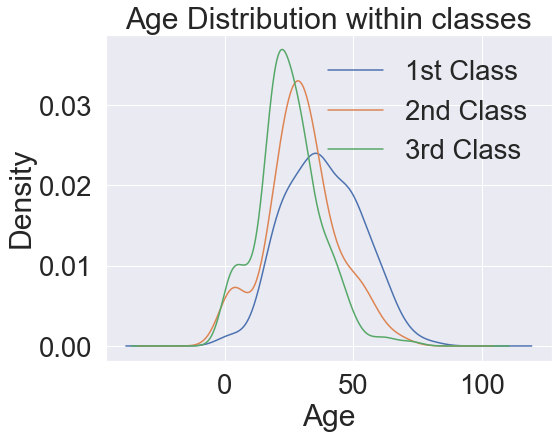

In [25]:
# Age distribution within classes
plt.figure(figsize=(8,6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

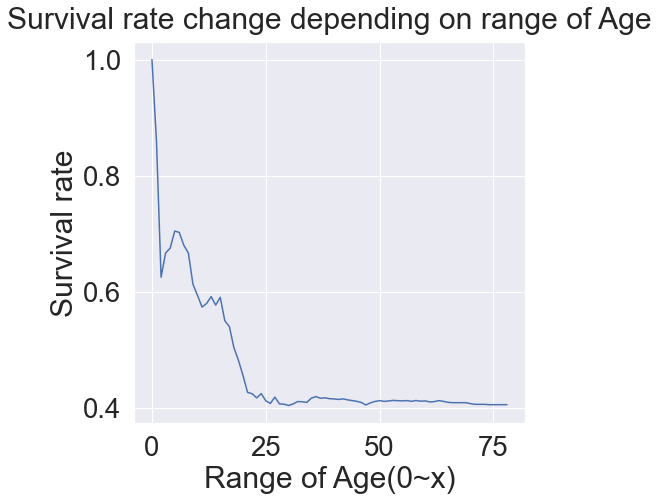

In [26]:
cummulate_survival_ratio = []
for i in range(1,80):
    cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))
    
plt.figure(figsize=(7,7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

나이가 어릴수록 생존율 높음

## Embarked

In [27]:
df_train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

<AxesSubplot:xlabel='Embarked'>

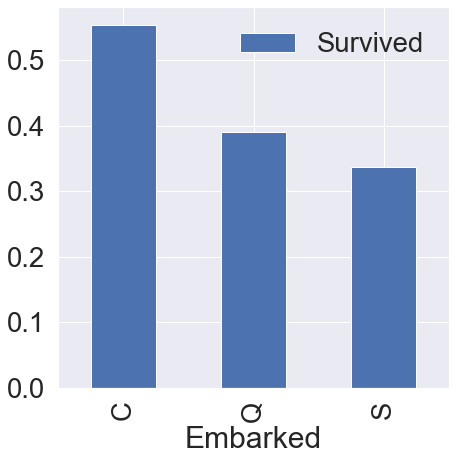

In [28]:
f, ax = plt.subplots(1, 1, figsize=(7,7))
df_train[['Embarked','Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

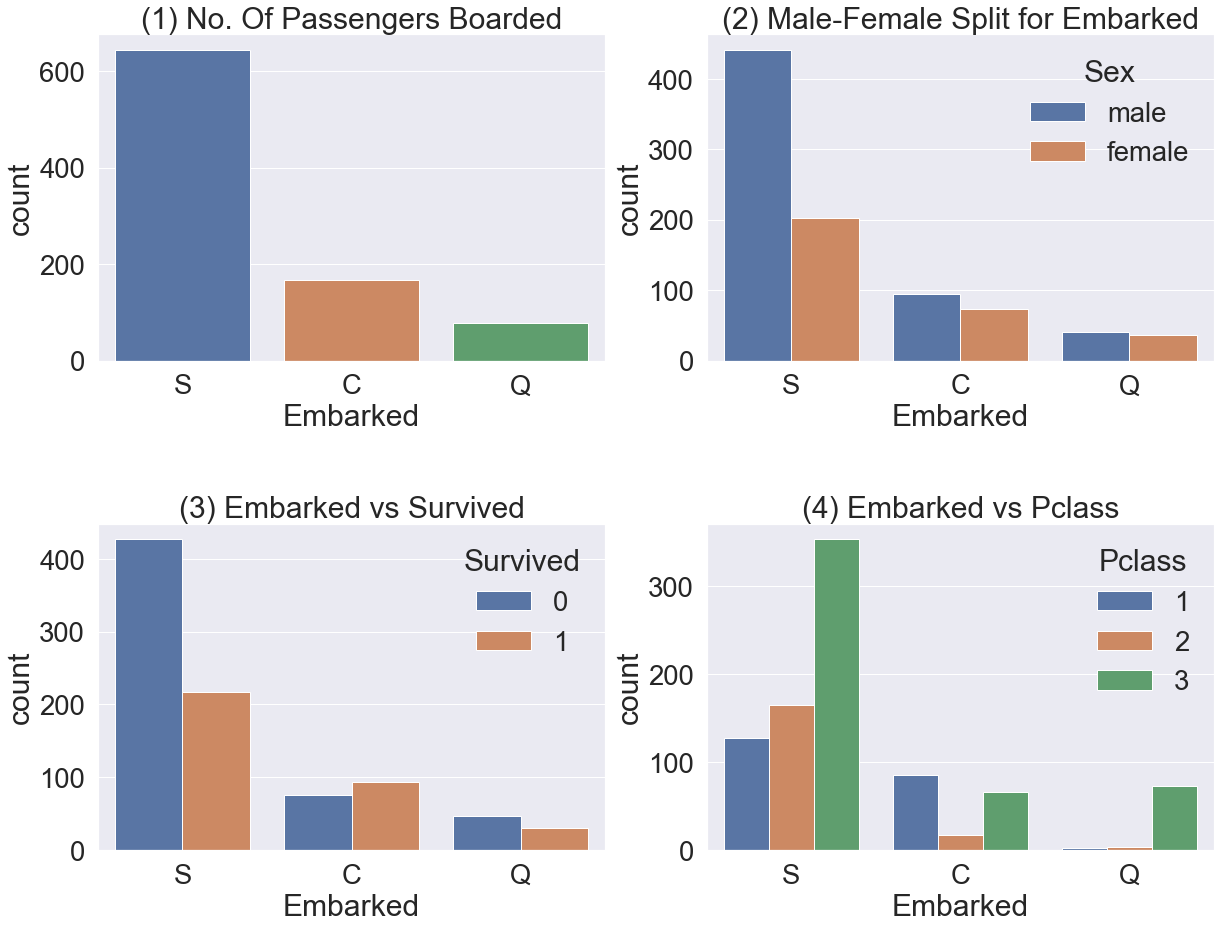

In [29]:
f,ax=plt.subplots(2, 2, figsize=(20,15))

sns.countplot('Embarked', data=df_train, ax=ax[0,0])
ax[0,0].set_title('(1) No. Of Passengers Boarded')
sns.countplot('Embarked', hue='Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')
sns.countplot('Embarked', hue='Survived', data=df_train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')
sns.countplot('Embarked', hue='Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()

Figure 1 : S에서 가장 많이 탐  
Figure 2 : C,Q는 남녀 비율 비슷하고, S는 남자가 더 많음  
Figure 3 : 생존확률이 S가 많이 낮음  
Figure 4 : C가 생존확률 높은 건 클래스 높은 사람이 많이 타서, S는 3등석이 많아서 생존확률 낮음

## Family - SibSp(형제자매) + Parch(부모자녀)

In [30]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1   # 자기 포함해야 해서 1 더함
df_test['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1    # 자기 포함해야 해서 1 더함

In [31]:
print("Maximum size of Family: ", df_train['FamilySize'].max())
print("Minimum size of Family: ", df_train['FamilySize'].min())

Maximum size of Family:  11
Minimum size of Family:  1


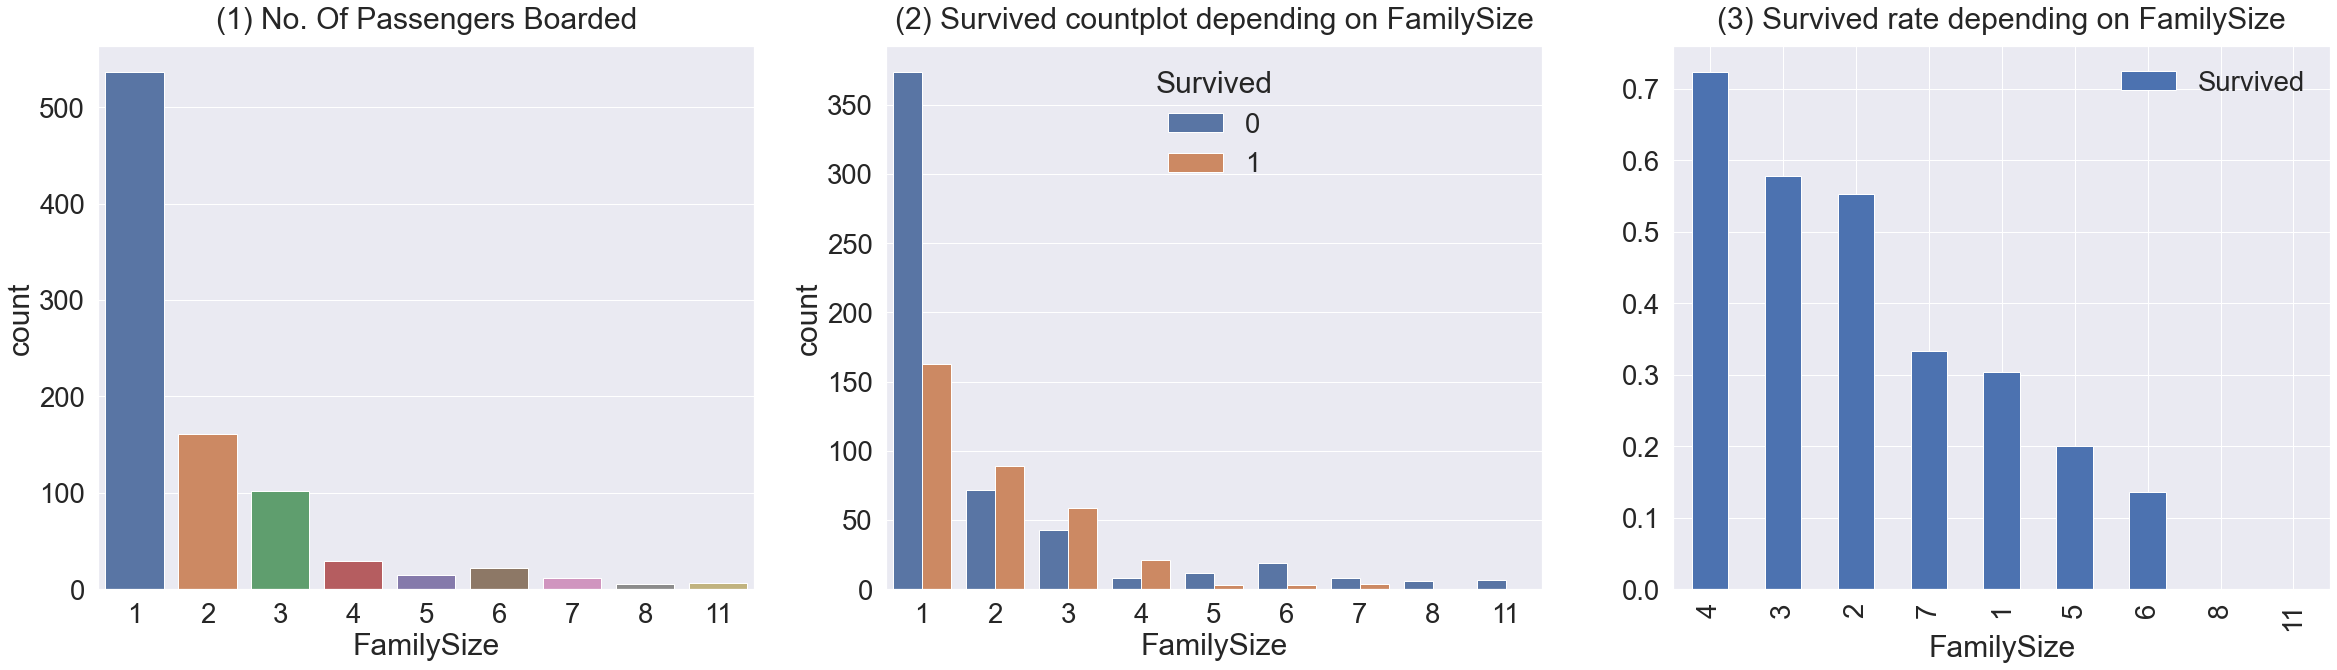

In [32]:
f,ax=plt.subplots(1, 3, figsize=(40,10))

sns.countplot('FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y=1.02)

sns.countplot('FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize',  y=1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize',  y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()

Figure 1 : 가족 크기가 1 ~ 11, 대부분 1명  
Figure 2,3 : 가족이 4명인 경우 가장 생존율 높음, 가족수 많아도 작아도 생존율 낮음, 3~4명인 경우 가장 높음

## Fare

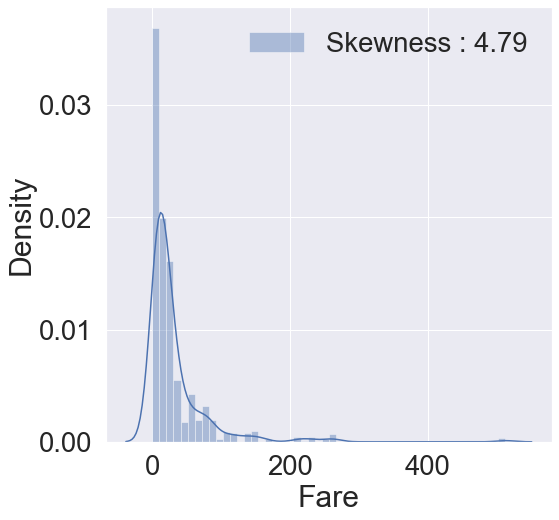

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

In [34]:
# test set에 결측치 있음 -> 평균값으로 대체
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean()

# 비대칭 심함 -> log 변환
df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

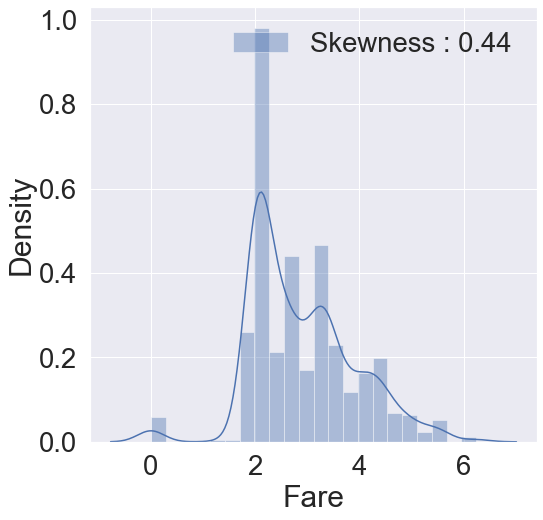

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

## Cabin

In [36]:
df_train['Cabin'].isnull().sum() / df_train.shape[0]

0.7710437710437711

In [37]:
df_train.head()[['PassengerId','Cabin']]

,PassengerId,Cabin
0,1,NaN
1,2,C85
2,3,NaN
3,4,C123
4,5,NaN


결측치 많아서 변수 탈락

## Ticket

In [38]:
df_train['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

# Feature Engineering

## Fill Null

### Fill Null in Age using title

In [39]:
df_train['Age'].isnull().sum()

177

In [40]:
df_train['Initial']= df_train.Name.str.extract('([A-Za-z]+)\.')   # lets extract the Salutations
df_test['Initial']= df_test.Name.str.extract('([A-Za-z]+)\.')     # lets extract the Salutations

In [41]:
# Checking the Initials with the Sex
pd.crosstab(df_train['Initial'], df_train['Sex']).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [42]:
df_train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

df_test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

In [43]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


<AxesSubplot:xlabel='Initial'>

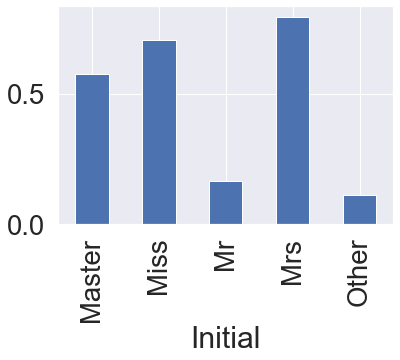

In [44]:
df_train.groupby('Initial')['Survived'].mean().plot.bar()

In [45]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


각 initial 그룹별 Age 평균값으로 결측치 채우기

In [46]:
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mr'),'Age'] = 33
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mrs'),'Age'] = 36
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Master'),'Age'] = 5
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Miss'),'Age'] = 22
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Other'),'Age'] = 46

df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mr'),'Age'] = 33
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mrs'),'Age'] = 36
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Master'),'Age'] = 5
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Miss'),'Age'] = 22
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Other'),'Age'] = 46

In [47]:
df_train.isnull().sum()[df_train.isnull().sum() > 0]

Cabin       687
Embarked      2
dtype: int64

In [48]:
df_test.isnull().sum()[df_test.isnull().sum() > 0]

Cabin    327
dtype: int64

### Fill Null in Embarked

In [49]:
print('Embarked has ', sum(df_train['Embarked'].isnull()), ' Null values')

Embarked has  2  Null values


결측치 2개 밖에 없으므로, 가장 많았던 S로 채움

In [50]:
df_train['Embarked'].fillna('S', inplace=True)

In [51]:
df_train.isnull().sum()[df_train.isnull().sum() > 0]

Cabin    687
dtype: int64

## Change Age (continuous to categorical)

In [52]:
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7    
    
df_train['Age_cat'] = df_train['Age'].apply(category_age)
df_test['Age_cat'] = df_test['Age'].apply(category_age)

In [53]:
df_train.groupby(['Age_cat'])['PassengerId'].count()

Age_cat
0     66
1    102
2    256
3    304
4     89
5     48
6     19
7      7
Name: PassengerId, dtype: int64

## Change Initial, Embarked and Sex (string to numerical)

In [54]:
df_train['Initial'] = df_train['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})
df_test['Initial'] = df_test['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})

In [55]:
df_train['Embarked'] = df_train['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
df_test['Embarked'] = df_test['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [56]:
df_train['Embarked'].isnull().any() , df_train['Embarked'].dtypes

(False, dtype('int64'))

In [57]:
df_train['Sex'] = df_train['Sex'].map({'female': 0, 'male': 1})
df_test['Sex'] = df_test['Sex'].map({'female': 0, 'male': 1})

상관관계 살펴보기

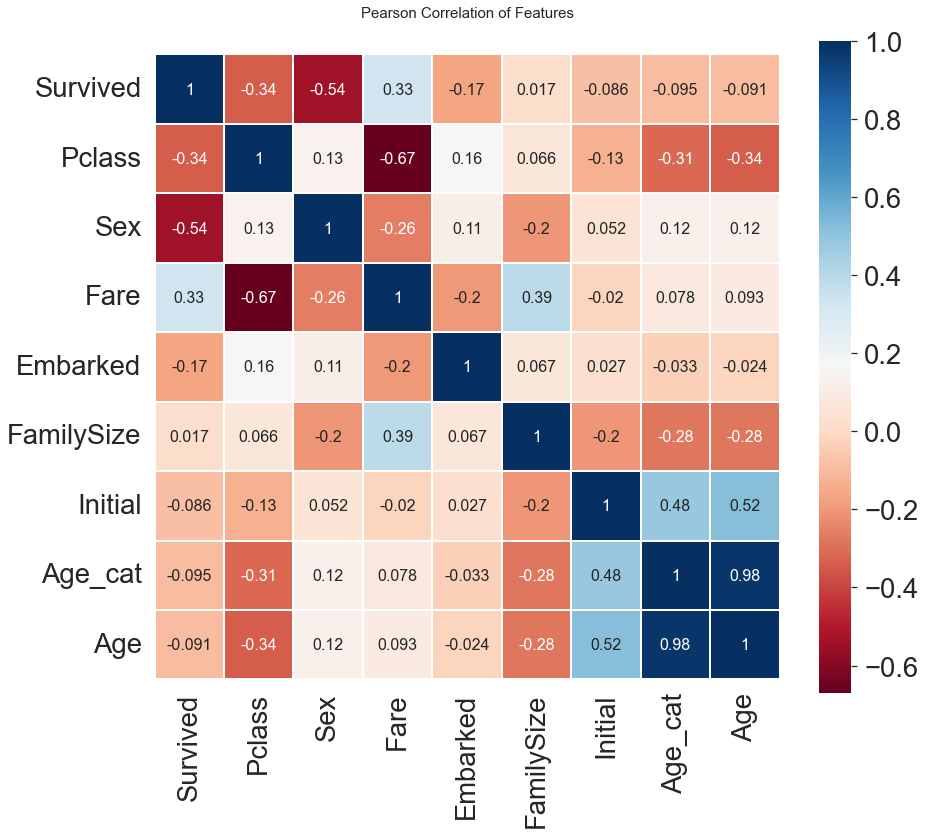

In [58]:
heatmap_data = df_train[['Survived', 'Pclass', 'Sex', 'Fare', 'Embarked', 'FamilySize', 'Initial', 'Age_cat', 'Age']] 

colormap = plt.cm.RdBu
plt.figure(figsize=(14, 12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 16})

del heatmap_data

Sex - Survived, Pclass - Survived 상관관계 어느정도 있음  
강한 상관관계 가지는 feature 없음 -> 불필요한 feature 없음

## One-hot encoding on Initial and Embarked

In [59]:
df_train = pd.get_dummies(df_train, columns=['Initial'], prefix='Initial')
df_test = pd.get_dummies(df_test, columns=['Initial'], prefix='Initial')

In [60]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,1.981001,NaN,2,2,2,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,4.266662,C85,0,2,3,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,2.070022,NaN,2,1,2,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,3.972177,C123,2,2,3,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,2.085672,NaN,2,1,3,0,0,1,0,0


In [61]:
df_train = pd.get_dummies(df_train, columns=['Embarked'], prefix='Embarked')
df_test = pd.get_dummies(df_test, columns=['Embarked'], prefix='Embarked')

## Drop columns

In [62]:
df_train.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)
df_test.drop(['PassengerId', 'Name',  'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [63]:
df_train.head()

,Survived,Pclass,Sex,Age,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,22.0,1.981001,2,2,0,0,1,0,0,0,0,1
1,1,1,0,38.0,4.266662,2,3,0,0,0,1,0,1,0,0
2,1,3,0,26.0,2.070022,1,2,0,1,0,0,0,0,0,1
3,1,1,0,35.0,3.972177,2,3,0,0,0,1,0,0,0,1
4,0,3,1,35.0,2.085672,1,3,0,0,1,0,0,0,0,1


In [64]:
df_train.dtypes

Survived        int64
Pclass          int64
Sex             int64
Age           float64
Fare          float64
FamilySize      int64
Age_cat         int64
Initial_0       uint8
Initial_1       uint8
Initial_2       uint8
Initial_3       uint8
Initial_4       uint8
Embarked_0      uint8
Embarked_1      uint8
Embarked_2      uint8
dtype: object

In [65]:
df_test.head()

,Pclass,Sex,Age,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,3,1,34.5,2.057860,2,3,0,0,1,0,0,0,1,0
1,3,0,47.0,1.945910,2,4,0,0,0,1,0,0,0,1
2,2,1,62.0,2.270836,1,6,0,0,1,0,0,0,1,0
3,3,1,27.0,2.159003,2,2,0,0,1,0,0,0,0,1
4,3,0,22.0,2.508582,1,2,0,0,0,1,0,0,0,1


In [66]:
df_test.dtypes

Pclass          int64
Sex             int64
Age           float64
Fare          float64
FamilySize      int64
Age_cat         int64
Initial_0       uint8
Initial_1       uint8
Initial_2       uint8
Initial_3       uint8
Initial_4       uint8
Embarked_0      uint8
Embarked_1      uint8
Embarked_2      uint8
dtype: object

# 모델 개발 및 학습

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

## Preparation - Split dataset into train, valid(dev), test set

In [68]:
X_train = df_train.drop('Survived', axis=1).values
target_label = df_train['Survived'].values
X_test = df_test.values

In [69]:
print(X_train.shape)
print(X_test.shape)

(891, 14)
(418, 14)


In [70]:
X_tr, X_vld, y_tr, y_vld = train_test_split(X_train, target_label, test_size=0.2, random_state=2018)

In [71]:
print(y_tr.shape)
print(y_vld.shape)

(712,)
(179,)


## Model generation and prediction

In [72]:
model = RandomForestClassifier()
model.fit(X_tr, y_tr)
prediction = model.predict(X_vld)

In [73]:
print('총 {}명 중 {:.2f}% 정확도로 생존을 맞춤'.format(y_vld.shape[0], 100 * metrics.accuracy_score(prediction, y_vld)))

총 179명 중 81.56% 정확도로 생존을 맞춤


In [74]:
from pandas import Series

feature_importance = model.feature_importances_
Series_feat_imp = Series(feature_importance, index=df_test.columns)

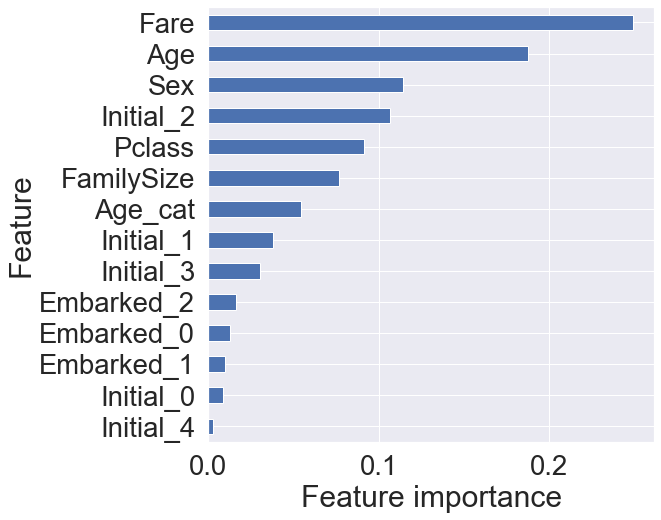

In [75]:
plt.figure(figsize=(8, 8))
Series_feat_imp.sort_values(ascending=True).plot.barh()
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

## keras를 사용한 NN 모델 개발

In [76]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout
from tensorflow.keras.optimizers import Adam, SGD

In [77]:
nn_model = Sequential()
nn_model.add(Dense(32,activation='relu',input_shape=(14,)))
nn_model.add(Dropout(0.2))
nn_model.add(Dense(64,activation='relu'))
nn_model.add(Dropout(0.2))
nn_model.add(Dense(32,activation='relu'))
nn_model.add(Dropout(0.2))
nn_model.add(Dense(1,activation='sigmoid'))

Loss = 'binary_crossentropy'
nn_model.compile(loss=Loss,optimizer=Adam(),metrics=['accuracy'])
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                480       
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 3

In [78]:
history = nn_model.fit(X_tr,y_tr,
                    batch_size=64,
                    epochs=500,
                    validation_data=(X_vld, y_vld),
                    verbose=1)

Epoch 1/500
12/12 [==============================] - 1s 19ms/step - loss: 1.3480 - accuracy: 0.5407 - val_loss: 0.8543 - val_accuracy: 0.6425
Epoch 2/500
12/12 [==============================] - 0s 4ms/step - loss: 1.0416 - accuracy: 0.5520 - val_loss: 0.6510 - val_accuracy: 0.6089
Epoch 3/500
12/12 [==============================] - 0s 4ms/step - loss: 0.8966 - accuracy: 0.5183 - val_loss: 0.6413 - val_accuracy: 0.6425
Epoch 4/500
12/12 [==============================] - 0s 4ms/step - loss: 0.8081 - accuracy: 0.5520 - val_loss: 0.6439 - val_accuracy: 0.6480
Epoch 5/500
12/12 [==============================] - 0s 4ms/step - loss: 0.7894 - accuracy: 0.5520 - val_loss: 0.6408 - val_accuracy: 0.6425
Epoch 6/500
12/12 [==============================] - 0s 4ms/step - loss: 0.7101 - accuracy: 0.5492 - val_loss: 0.6381 - val_accuracy: 0.6425
Epoch 7/500
12/12 [==============================] - 0s 4ms/step - loss: 0.7305 - accuracy: 0.5744 - val_loss: 0.6335 - val_accuracy: 0.6480
Epoch 8/500


Epoch 59/500
12/12 [==============================] - 0s 5ms/step - loss: 0.4687 - accuracy: 0.7907 - val_loss: 0.4045 - val_accuracy: 0.8492
Epoch 60/500
12/12 [==============================] - 0s 4ms/step - loss: 0.4670 - accuracy: 0.7992 - val_loss: 0.4060 - val_accuracy: 0.8436
Epoch 61/500
12/12 [==============================] - 0s 4ms/step - loss: 0.4655 - accuracy: 0.7992 - val_loss: 0.4172 - val_accuracy: 0.8324
Epoch 62/500
12/12 [==============================] - 0s 4ms/step - loss: 0.4745 - accuracy: 0.7865 - val_loss: 0.4137 - val_accuracy: 0.8547
Epoch 63/500
12/12 [==============================] - 0s 4ms/step - loss: 0.4650 - accuracy: 0.7781 - val_loss: 0.4191 - val_accuracy: 0.8268
Epoch 64/500
12/12 [==============================] - 0s 4ms/step - loss: 0.4909 - accuracy: 0.7809 - val_loss: 0.4115 - val_accuracy: 0.8492
Epoch 65/500
12/12 [==============================] - 0s 4ms/step - loss: 0.4817 - accuracy: 0.8062 - val_loss: 0.4095 - val_accuracy: 0.8492
Epoch 

12/12 [==============================] - 0s 4ms/step - loss: 0.4231 - accuracy: 0.8160 - val_loss: 0.3892 - val_accuracy: 0.8492
Epoch 117/500
12/12 [==============================] - 0s 4ms/step - loss: 0.4206 - accuracy: 0.8244 - val_loss: 0.3908 - val_accuracy: 0.8492
Epoch 118/500
12/12 [==============================] - 0s 3ms/step - loss: 0.4107 - accuracy: 0.8244 - val_loss: 0.3925 - val_accuracy: 0.8603
Epoch 119/500
12/12 [==============================] - 0s 4ms/step - loss: 0.4162 - accuracy: 0.8343 - val_loss: 0.3864 - val_accuracy: 0.8380
Epoch 120/500
12/12 [==============================] - 0s 3ms/step - loss: 0.4175 - accuracy: 0.8216 - val_loss: 0.3864 - val_accuracy: 0.8436
Epoch 121/500
12/12 [==============================] - 0s 4ms/step - loss: 0.4326 - accuracy: 0.8174 - val_loss: 0.3850 - val_accuracy: 0.8492
Epoch 122/500
12/12 [==============================] - 0s 3ms/step - loss: 0.4214 - accuracy: 0.8301 - val_loss: 0.3905 - val_accuracy: 0.8492
Epoch 123/500

12/12 [==============================] - 0s 4ms/step - loss: 0.4156 - accuracy: 0.8244 - val_loss: 0.3903 - val_accuracy: 0.8547
Epoch 174/500
12/12 [==============================] - 0s 4ms/step - loss: 0.3969 - accuracy: 0.8357 - val_loss: 0.3873 - val_accuracy: 0.8436
Epoch 175/500
12/12 [==============================] - 0s 4ms/step - loss: 0.3977 - accuracy: 0.8483 - val_loss: 0.3919 - val_accuracy: 0.8547
Epoch 176/500
12/12 [==============================] - 0s 4ms/step - loss: 0.4019 - accuracy: 0.8301 - val_loss: 0.3894 - val_accuracy: 0.8492
Epoch 177/500
12/12 [==============================] - 0s 4ms/step - loss: 0.3936 - accuracy: 0.8272 - val_loss: 0.3913 - val_accuracy: 0.8492
Epoch 178/500
12/12 [==============================] - 0s 4ms/step - loss: 0.4039 - accuracy: 0.8287 - val_loss: 0.3871 - val_accuracy: 0.8436
Epoch 179/500
12/12 [==============================] - 0s 3ms/step - loss: 0.4004 - accuracy: 0.8357 - val_loss: 0.3848 - val_accuracy: 0.8547
Epoch 180/500

12/12 [==============================] - 0s 3ms/step - loss: 0.3937 - accuracy: 0.8301 - val_loss: 0.3887 - val_accuracy: 0.8603
Epoch 231/500
12/12 [==============================] - 0s 4ms/step - loss: 0.3985 - accuracy: 0.8413 - val_loss: 0.3876 - val_accuracy: 0.8547
Epoch 232/500
12/12 [==============================] - 0s 3ms/step - loss: 0.3781 - accuracy: 0.8413 - val_loss: 0.3873 - val_accuracy: 0.8547
Epoch 233/500
12/12 [==============================] - 0s 3ms/step - loss: 0.3746 - accuracy: 0.8455 - val_loss: 0.3854 - val_accuracy: 0.8547
Epoch 234/500
12/12 [==============================] - 0s 4ms/step - loss: 0.3833 - accuracy: 0.8497 - val_loss: 0.3893 - val_accuracy: 0.8492
Epoch 235/500
12/12 [==============================] - 0s 3ms/step - loss: 0.3966 - accuracy: 0.8343 - val_loss: 0.3896 - val_accuracy: 0.8547
Epoch 236/500
12/12 [==============================] - 0s 3ms/step - loss: 0.3808 - accuracy: 0.8469 - val_loss: 0.3919 - val_accuracy: 0.8436
Epoch 237/500

12/12 [==============================] - 0s 4ms/step - loss: 0.3847 - accuracy: 0.8427 - val_loss: 0.3897 - val_accuracy: 0.8547
Epoch 288/500
12/12 [==============================] - 0s 4ms/step - loss: 0.3738 - accuracy: 0.8455 - val_loss: 0.3823 - val_accuracy: 0.8492
Epoch 289/500
12/12 [==============================] - 0s 4ms/step - loss: 0.4024 - accuracy: 0.8371 - val_loss: 0.3859 - val_accuracy: 0.8547
Epoch 290/500
12/12 [==============================] - 0s 4ms/step - loss: 0.3904 - accuracy: 0.8385 - val_loss: 0.3816 - val_accuracy: 0.8492
Epoch 291/500
12/12 [==============================] - 0s 4ms/step - loss: 0.3841 - accuracy: 0.8413 - val_loss: 0.3830 - val_accuracy: 0.8492
Epoch 292/500
12/12 [==============================] - 0s 4ms/step - loss: 0.3865 - accuracy: 0.8399 - val_loss: 0.3881 - val_accuracy: 0.8603
Epoch 293/500
12/12 [==============================] - 0s 4ms/step - loss: 0.3820 - accuracy: 0.8483 - val_loss: 0.3842 - val_accuracy: 0.8547
Epoch 294/500

12/12 [==============================] - 0s 3ms/step - loss: 0.3729 - accuracy: 0.8469 - val_loss: 0.3850 - val_accuracy: 0.8380
Epoch 345/500
12/12 [==============================] - 0s 3ms/step - loss: 0.3757 - accuracy: 0.8441 - val_loss: 0.3873 - val_accuracy: 0.8324
Epoch 346/500
12/12 [==============================] - 0s 3ms/step - loss: 0.3804 - accuracy: 0.8216 - val_loss: 0.3834 - val_accuracy: 0.8492
Epoch 347/500
12/12 [==============================] - 0s 4ms/step - loss: 0.3722 - accuracy: 0.8399 - val_loss: 0.3817 - val_accuracy: 0.8603
Epoch 348/500
12/12 [==============================] - 0s 4ms/step - loss: 0.3898 - accuracy: 0.8413 - val_loss: 0.3838 - val_accuracy: 0.8492
Epoch 349/500
12/12 [==============================] - 0s 4ms/step - loss: 0.3749 - accuracy: 0.8371 - val_loss: 0.3811 - val_accuracy: 0.8547
Epoch 350/500
12/12 [==============================] - 0s 4ms/step - loss: 0.3754 - accuracy: 0.8497 - val_loss: 0.3882 - val_accuracy: 0.8492
Epoch 351/500

12/12 [==============================] - 0s 4ms/step - loss: 0.3770 - accuracy: 0.8441 - val_loss: 0.3901 - val_accuracy: 0.8492
Epoch 402/500
12/12 [==============================] - 0s 4ms/step - loss: 0.3685 - accuracy: 0.8455 - val_loss: 0.3900 - val_accuracy: 0.8547
Epoch 403/500
12/12 [==============================] - 0s 4ms/step - loss: 0.3734 - accuracy: 0.8455 - val_loss: 0.3919 - val_accuracy: 0.8603
Epoch 404/500
12/12 [==============================] - 0s 4ms/step - loss: 0.3692 - accuracy: 0.8399 - val_loss: 0.3882 - val_accuracy: 0.8547
Epoch 405/500
12/12 [==============================] - 0s 4ms/step - loss: 0.3695 - accuracy: 0.8497 - val_loss: 0.3893 - val_accuracy: 0.8547
Epoch 406/500
12/12 [==============================] - 0s 4ms/step - loss: 0.3719 - accuracy: 0.8469 - val_loss: 0.3941 - val_accuracy: 0.8492
Epoch 407/500
12/12 [==============================] - 0s 3ms/step - loss: 0.3605 - accuracy: 0.8483 - val_loss: 0.3934 - val_accuracy: 0.8547
Epoch 408/500

12/12 [==============================] - 0s 4ms/step - loss: 0.3723 - accuracy: 0.8413 - val_loss: 0.3939 - val_accuracy: 0.8547
Epoch 459/500
12/12 [==============================] - 0s 4ms/step - loss: 0.3522 - accuracy: 0.8596 - val_loss: 0.3922 - val_accuracy: 0.8547
Epoch 460/500
12/12 [==============================] - 0s 4ms/step - loss: 0.3623 - accuracy: 0.8483 - val_loss: 0.3926 - val_accuracy: 0.8547
Epoch 461/500
12/12 [==============================] - 0s 4ms/step - loss: 0.3829 - accuracy: 0.8427 - val_loss: 0.3980 - val_accuracy: 0.8436
Epoch 462/500
12/12 [==============================] - 0s 4ms/step - loss: 0.3655 - accuracy: 0.8525 - val_loss: 0.3957 - val_accuracy: 0.8547
Epoch 463/500
12/12 [==============================] - 0s 4ms/step - loss: 0.3693 - accuracy: 0.8441 - val_loss: 0.3980 - val_accuracy: 0.8547
Epoch 464/500
12/12 [==============================] - 0s 4ms/step - loss: 0.3818 - accuracy: 0.8413 - val_loss: 0.4026 - val_accuracy: 0.8492
Epoch 465/500

In [79]:
hists = [history]
hist_df = pd.concat([pd.DataFrame(hist.history) for hist in hists], sort=True)
hist_df.index = np.arange(1, len(hist_df)+1)

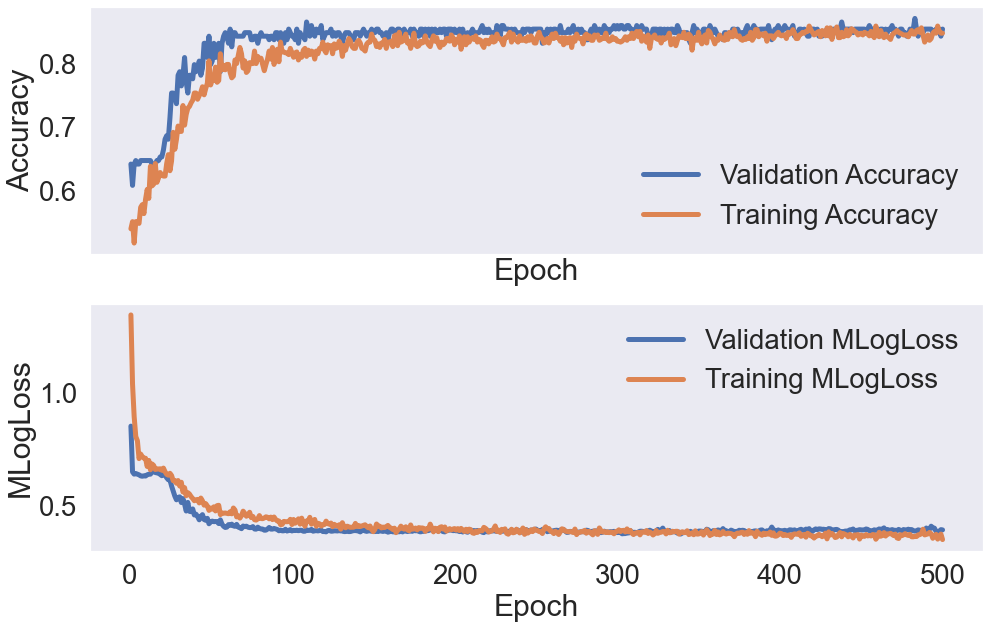

In [80]:
fig, axs = plt.subplots(nrows=2, sharex=True, figsize=(16, 10))

axs[0].plot(hist_df.val_accuracy, lw=5, label='Validation Accuracy')
axs[0].plot(hist_df.accuracy, lw=5, label='Training Accuracy')
axs[0].set_ylabel('Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].grid()
axs[0].legend(loc=0)
axs[1].plot(hist_df.val_loss, lw=5, label='Validation MLogLoss')
axs[1].plot(hist_df.loss, lw=5, label='Training MLogLoss')
axs[1].set_ylabel('MLogLoss')
axs[1].set_xlabel('Epoch')
axs[1].grid()
axs[1].legend(loc=0)
fig.savefig('hist.png', dpi=300)
plt.show();

# 모델 예측 및 평가

In [81]:
submission = pd.read_csv('input/sample_submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [82]:
prediction = model.predict(X_test)
submission['Survived'] = prediction

In [83]:
submission.to_csv('my_first_submission.csv', index=False)

## NN 예측 및 평가

In [84]:
submission = pd.read_csv('input/sample_submission.csv')
prediction = nn_model.predict(X_test)
prediction = prediction > 0.5
prediction = prediction.astype(np.int)
prediction = prediction.T[0]
prediction.shape

(418,)

In [85]:
submission['Survived'] = prediction
submission.to_csv('my_nn_submission.csv', index=False)